<a href="https://colab.research.google.com/github/kulsrana30/Competitive-Programming/blob/master/Dog_Vs_Cats_classifiaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [26]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,BatchNormalization,Dropout

In [16]:
# generators
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
# Normalizee
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [38]:
# create CNN model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 107ms/step - loss: 0.7585 - accuracy: 0.6098 - val_loss: 0.7635 - val_accuracy: 0.5416
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5289 - accuracy: 0.7375 - val_loss: 0.4870 - val_accuracy: 0.7736
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4250 - accuracy: 0.8106 - val_loss: 0.4222 - val_accuracy: 0.8062
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3368 - accuracy: 0.8566 - val_loss: 0.3523 - val_accuracy: 0.8478
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2501 - accuracy: 0.8957 - val_loss: 0.3425 - val_accuracy: 0.8462
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.1880 - accuracy: 0.9262 - val_loss: 0.4460 - val_accuracy: 0.8186
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.1319 - accuracy: 0.9499 - val_loss: 0.4439 - val_ac

# Graph before hypertuining

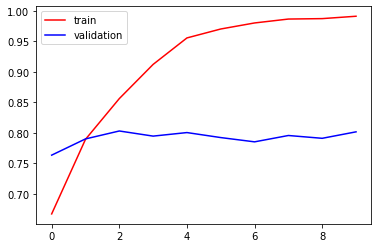

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# Graph after hypertuining

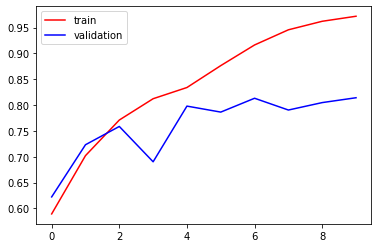

In [31]:
# with Dropout of 0.1 and BatchNormalisation
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()



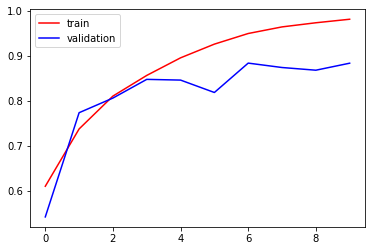

In [42]:
# adding one more convolution layer with one more dense layer with 128 neuron
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# Graph before hypertuining

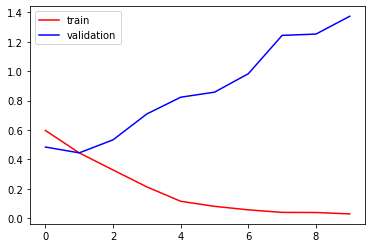

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Graph after hypertuining

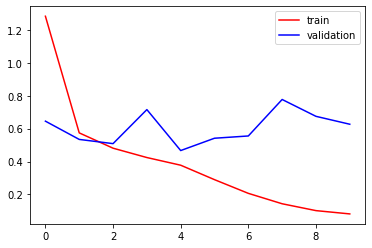

In [32]:
# with Dropout of 0.1 and BatchNormalisation

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

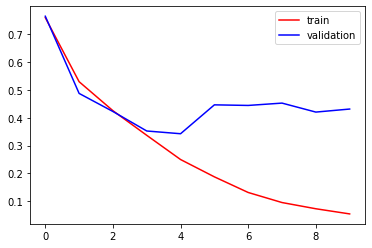

In [43]:
# graph after adding one more convolution layer with dense layer of 128 neuron
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [24]:
# way to reduce the verfitting

# add more data
# data augmentation 
# L1/L2 Regularization
# dropout
# Batch Normalization
# reduce Commplexity

In [72]:
import cv2

In [81]:
def prediction(X):
  #plt.imshow(X)
  X=cv2.resize(X,(256,256))
  test_input=X.reshape((1,256,256,3))
  a=model.predict(test_input)
  if a[0]==0:
    print("It's a CAT!!!!!!!!")
  else:
    print("It's a DOG!!!!!!!!")


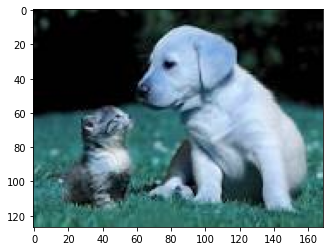

In [84]:
test_img=cv2.imread('/content/dog vs cat.jpg')
plt.imshow(test_img)


In [85]:
prediction(test_img)

1/1 [==============================] - 0s 18ms/step
It's a CAT!!!!!!!!
